In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
#Check Duplicate
data.duplicated().sum()

0

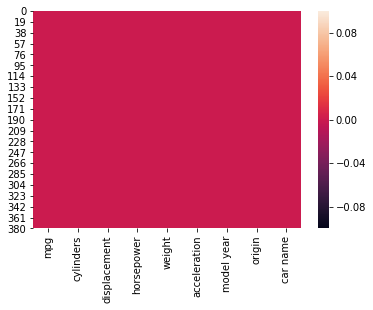

In [8]:
#To check missing value
sns.heatmap(data.isnull())

In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [11]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
data = data[data.horsepower != '?']
print('?' in data.horsepower)

False


In [13]:
data.shape

(392, 9)

In [14]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [15]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['car name']= le.fit_transform(data['car name']) 

In [17]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,48
1,15.0,8,350.0,165.0,3693,11.5,70,1,35


In [18]:
#Check Skewness
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
car name        0.016312
dtype: float64

In [19]:
for col in data.columns:
    if data.skew().loc[col] > 0.55:
        data[col]=np.log1p(data[col])

In [20]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.214231
horsepower      0.377557
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.790401
car name        0.016312
dtype: float64

Plotting Outliers

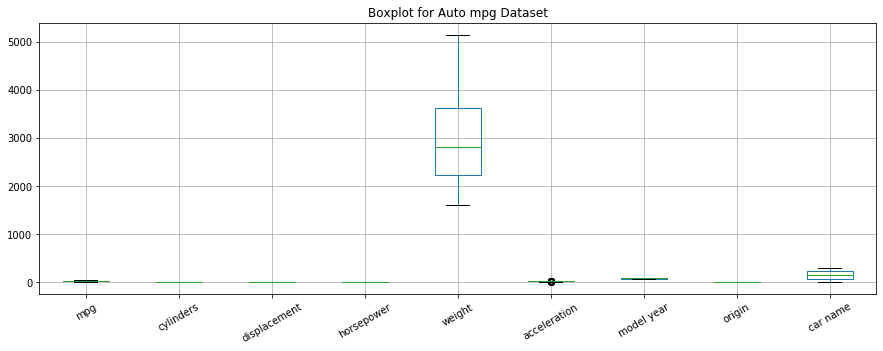

In [21]:
data.plot(kind='box',grid=True,title="Boxplot for Auto mpg Dataset",legend=True,rot=30,figsize=(15,5))

In [22]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data=data.loc[(z_score < 3).all(axis=1)]
print(data.shape)

(392, 9)
(390, 9)


Exploring Data Variables

In [23]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,5.730100,4.875197,3504,12.0,70,0.693147,48
1,15.0,8,5.860786,5.111988,3693,11.5,70,0.693147,35
2,18.0,8,5.765191,5.017280,3436,11.0,70,0.693147,229
3,16.0,8,5.720312,5.017280,3433,12.0,70,0.693147,13
4,17.0,8,5.713733,4.948760,3449,10.5,70,0.693147,159


In [24]:
data.nunique()

mpg             126
cylinders         5
displacement     81
horsepower       93
weight          345
acceleration     93
model year       13
origin            3
car name        300
dtype: int64

In [31]:
data.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

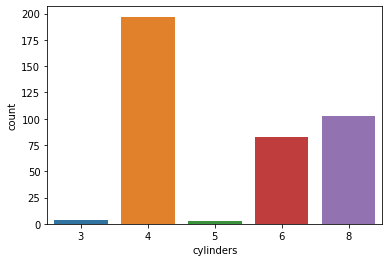

In [32]:
sns.countplot(x='cylinders',data=data)

In [33]:
data.origin.unique()

array([0.69314718, 1.38629436, 1.09861229])

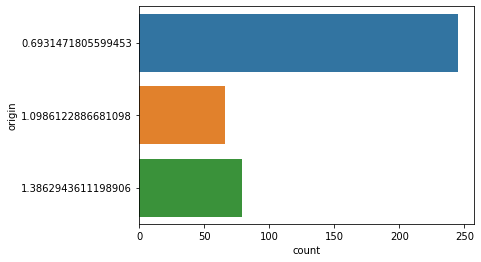

In [282]:
sns.countplot(y="origin",data=data)

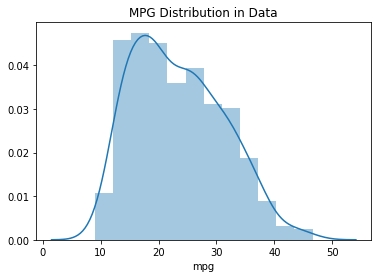

In [283]:
sns.distplot(data['mpg']);
plt.title('MPG Distribution in Data')
plt.show()

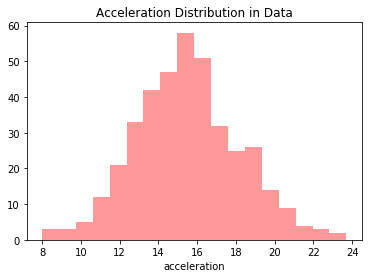

In [284]:
sns.distplot(data['acceleration'], hist=True, kde=False, color='red')
plt.title('Acceleration Distribution in Data')
plt.show()

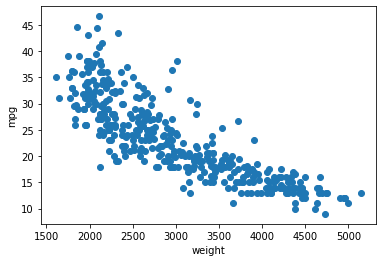

In [264]:
plt.scatter(x=data['weight'], y=data['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

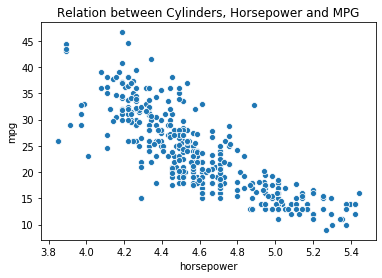

In [281]:
sns.scatterplot(x='horsepower', y='mpg', data=data);
plt.title('Relation between Cylinders, Horsepower and MPG')
plt.show()

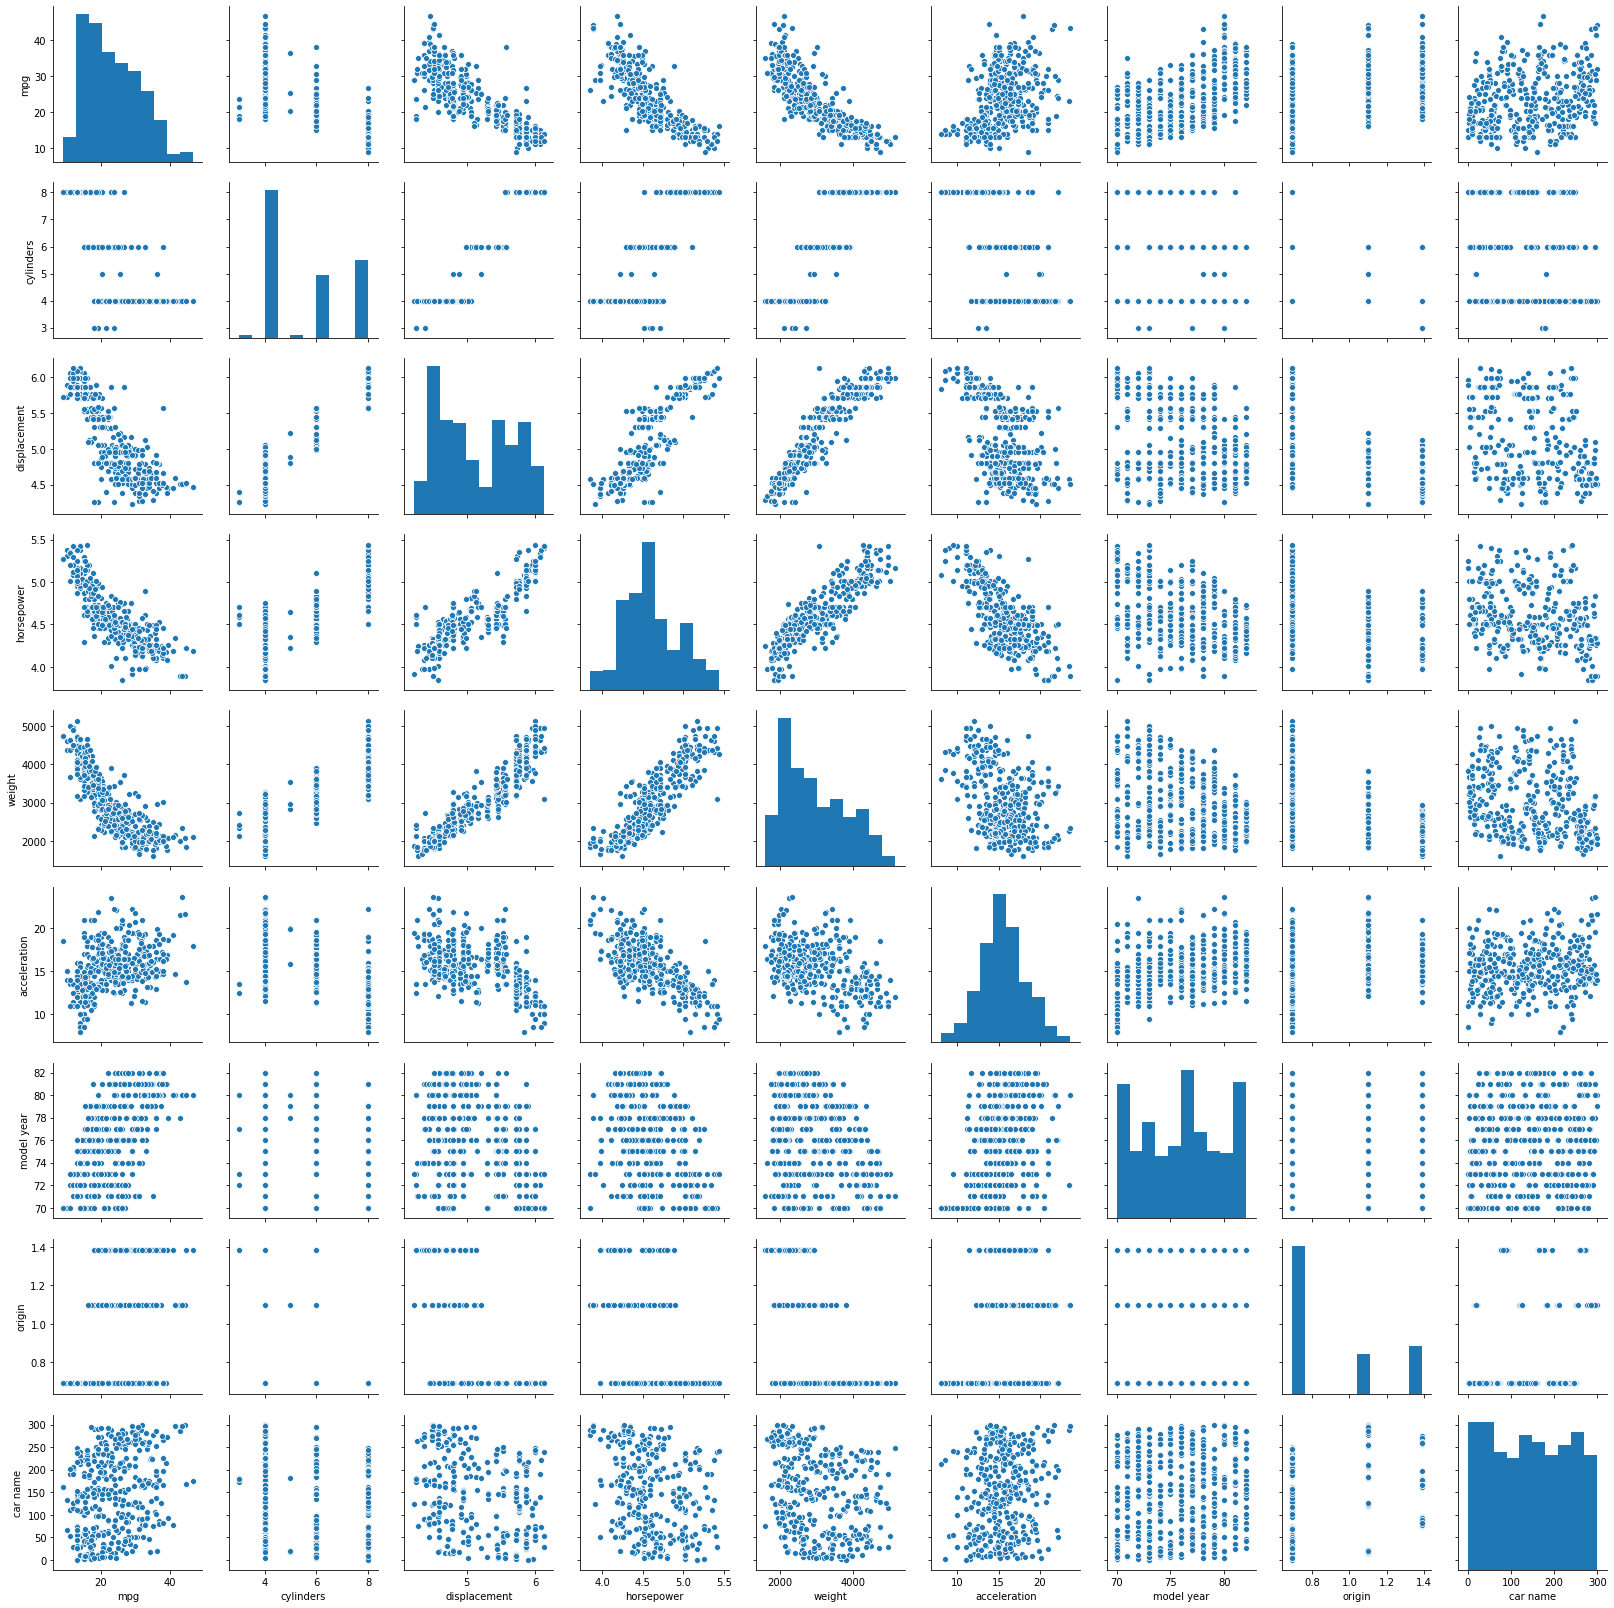

In [291]:
sns.pairplot(data)

In [37]:
#Correlation
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1.000000,-0.779389,-0.829934,-0.815702,-0.834648,0.412510,0.576256,0.572519,0.256752
cylinders,-0.779389,1.000000,0.943233,0.843613,0.898807,-0.505425,-0.342330,-0.582901,-0.271796
displacement,-0.829934,0.943233,1.000000,0.872793,0.936617,-0.500830,-0.326912,-0.686430,-0.311587
horsepower,-0.815702,0.843613,0.872793,1.000000,0.878564,-0.698403,-0.391469,-0.494717,-0.260505
weight,-0.834648,0.898807,0.936617,0.878564,1.000000,-0.423299,-0.307198,-0.595477,-0.246912
acceleration,0.412510,-0.505425,-0.500830,-0.698403,-0.423299,1.000000,0.278622,0.219287,0.117776
model year,0.576256,-0.342330,-0.326912,-0.391469,-0.307198,0.278622,1.000000,0.171248,0.067348
origin,0.572519,-0.582901,-0.686430,-0.494717,-0.595477,0.219287,0.171248,1.000000,0.371517
car name,0.256752,-0.271796,-0.311587,-0.260505,-0.246912,0.117776,0.067348,0.371517,1.000000


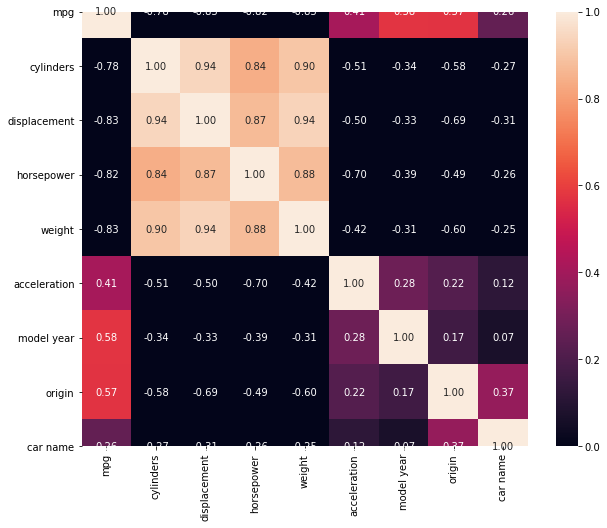

In [38]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [39]:
x=data.drop("mpg",axis=1)
y=data["mpg"]

In [40]:
x.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,5.730100,4.875197,3504,12.0,70,0.693147,48
1,8,5.860786,5.111988,3693,11.5,70,0.693147,35


In [41]:
y.head(2)

0    18.0
1    15.0
Name: mpg, dtype: float64

In [42]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(390, 1)

Standardisation

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 1.47857001,  1.12134659,  0.80979326, ..., -1.62185993,
        -0.73238819, -1.10913859],
       [ 1.47857001,  1.36822089,  1.5092803 , ..., -1.62185993,
        -0.73238819, -1.25627307],
       [ 1.47857001,  1.18763614,  1.22950981, ..., -1.62185993,
        -0.73238819,  0.93942608],
       ...,
       [-0.86788901, -0.42285444, -0.46796245, ...,  1.64559787,
        -0.73238819, -0.31687601],
       [-0.86788901, -0.64361798, -0.64704963, ...,  1.64559787,
        -0.73238819,  0.12452743],
       [-0.86788901, -0.6592949 , -0.53829991, ...,  1.64559787,
        -0.73238819, -0.88277786]])

Spilt Train and Test

In [44]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [45]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
    return random_state

LinearRegression

In [256]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x000000AF7766B3A8> 
is:  87 
and it produces 
 r2 score of  0.8536530735245302 
 mean abs error value of  2.24478973361848 
 mean squared error value of 10.13384632454617 
 & root mean sq error  3.1833702776375494

prediction:  [[26.48155169]
 [31.43915062]
 [32.21371127]
 [25.84419025]
 [23.40138127]
 [34.46722724]
 [31.9106242 ]
 [14.04519885]
 [24.71487611]
 [34.12303153]
 [31.64230838]
 [20.16840608]
 [25.34927379]
 [30.38641802]
 [13.61410063]
 [29.1445362 ]
 [23.53575622]
 [36.48285851]
 [23.79768396]
 [30.98712368]
 [33.50891853]
 [34.08198379]
 [23.14132942]
 [24.84211442]
 [22.93200249]
 [35.4245509 ]
 [ 8.93407224]
 [25.37756688]
 [21.55035007]
 [27.53014925]
 [28.41030538]
 [35.03917742]
 [13.89031588]
 [23.68192057]
 [24.50017641]
 [18.42757473]
 [20.75021259]
 [29.69469335]
 [33.81635957]
 [ 8.32303845]
 [30.13285772]
 [19.31018374]
 [14.81245239]
 [23.18898468]
 [12.8830491 ]
 [24.04442138]
 [13.29749812]
 [16.13780038]
 [ 8.05844984

87

In [261]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=10,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.6613827736006764


Decision Tree Regressor

In [240]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse','mae'],'max_depth':[6,8,9]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=10)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 6}

In [243]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6)
mod(dtr,x,y)

the random state at  <function mod at 0x000000AF7766B3A8> 
is:  61 
and it produces 
 r2 score of  0.7930789472312776 
 mean abs error value of  2.5354666304688793 
 mean squared error value of 14.328323802707391 
 & root mean sq error  3.785277242515717

prediction:  [19.7        29.66666667 34.34166667 24.29473684 19.55833333 35.99285714
 43.1        14.66666667 24.29473684 34.45       33.9        19.55833333
 26.5962963  34.34166667 14.97222222 31.33333333 26.5962963  35.99285714
 19.         25.83333333 33.9        35.99285714 26.5962963  26.5962963
 20.125      35.99285714 12.54545455 27.8        19.55833333 31.13333333
 26.5962963  35.99285714 12.875      25.25       29.66666667 19.7
 18.06666667 25.83333333 35.99285714 12.875      29.66666667 18.06666667
 14.97222222 22.125      12.875      22.125      12.875      13.25
 12.54545455 20.125      31.33333333 12.875      22.125      29.
 12.875      24.         33.9        17.5        25.33333333 19.55833333
 14.97222222 35.9928571

61

In [255]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=10,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.688599441552963


KNeighbors Regressor

In [189]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute','auto']}
k_grid=GridSearchCV(knr,k_para,cv=20)
k_grid.fit(x,y)
k_grid.best_params_

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'ball_tree', 'n_neighbors': 8}

In [190]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=8)
mod(knr,x,y)

the random state at  <function mod at 0x000000AF7766B3A8> 
is:  87 
and it produces 
 r2 score of  0.8605293461990919 
 mean abs error value of  2.164636752136752 
 mean squared error value of 9.657696314102564 
 & root mean sq error  3.1076834320925553

prediction:  [[25.1875]
 [28.225 ]
 [31.5625]
 [25.5125]
 [24.8   ]
 [35.85  ]
 [33.4875]
 [15.    ]
 [24.5875]
 [32.625 ]
 [32.7125]
 [18.125 ]
 [26.25  ]
 [32.3875]
 [14.5625]
 [31.5875]
 [25.75  ]
 [35.85  ]
 [23.1375]
 [31.7875]
 [35.3875]
 [33.8   ]
 [23.75  ]
 [24.125 ]
 [19.05  ]
 [35.85  ]
 [12.75  ]
 [27.9125]
 [19.075 ]
 [28.1   ]
 [29.925 ]
 [35.7375]
 [14.8125]
 [24.4625]
 [25.5   ]
 [19.5125]
 [16.8   ]
 [32.9375]
 [32.675 ]
 [12.5   ]
 [27.4375]
 [17.2375]
 [13.75  ]
 [25.75  ]
 [13.9375]
 [24.5   ]
 [14.125 ]
 [15.    ]
 [13.3125]
 [19.0125]
 [34.375 ]
 [13.25  ]
 [23.375 ]
 [29.0125]
 [14.5   ]
 [18.0625]
 [33.2   ]
 [17.9   ]
 [26.65  ]
 [18.875 ]
 [13.75  ]
 [32.675 ]
 [35.6875]
 [16.    ]
 [13.    ]
 [23.55  ]
 [18.4

87

In [191]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=20,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.6735655669753065


SVR

In [145]:
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.001,1]}
svr_grid=GridSearchCV(svr,svr_para,cv=10)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.001, 'kernel': 'linear'}

In [144]:
svr=SVR(kernel='linear',gamma=0.001)
mod(svr,x,y)

the random state at  <function mod at 0x000000AF7766B3A8> 
is:  87 
and it produces 
 r2 score of  0.8565467550965302 
 mean abs error value of  2.093413326382162 
 mean squared error value of 9.933472288213164 
 & root mean sq error  3.1517411518418137

prediction:  [27.29304144 31.60371746 32.28110747 26.61728165 23.18277124 34.30266352
 30.54356424 13.84131472 24.74711941 33.43116411 31.53078485 19.12714554
 26.2205493  30.06328561 14.29162036 29.34789851 23.3806899  36.14194497
 25.01368556 30.85107795 32.95905756 33.55189479 22.77687801 25.63159535
 21.55521147 35.20079813 10.42625154 25.49273769 20.37020389 27.52679548
 28.3558807  34.83908071 14.61779547 23.02256129 24.01953767 19.02119134
 20.09226721 29.65535714 33.2653326   9.69922365 30.59202802 18.7485934
 14.66071208 23.32074784 13.31990587 23.94937676 13.42068859 15.82655262
  9.43374169 22.38219828 31.68379973 12.43565627 23.85315151 24.89756278
 13.38937485 20.47486262 27.85149122 15.93210232 23.14494372 18.94675314
 12

87

In [150]:
#Cross Validation
svr_scr=cross_val_score(svr,x,y,cv=10,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.6991575025423106


AdaBoost Regressor

In [266]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

ada_param= {"learning_rate": [0.0001,0.025,0.1,1.0],"n_estimators":[250,500,750,1000]}

ada_g= GridSearchCV(ada,ada_param,cv=10)
ada_g.fit(x_train,y_train)
print("best parameters:", ada_g.best_params_)
print("\n best score:",ada_g.best_score_)

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters: {'learning_rate': 1.0, 'n_estimators': 500}

 best score: 0.8343623203425269


In [267]:
ada=AdaBoostRegressor(learning_rate=1.0, n_estimators=500)
mod(ada,x,y)

the random state at  <function mod at 0x000000AF7766B3A8> 
is:  50 
and it produces 
 r2 score of  0.8844494415031323 
 mean abs error value of  2.125551051916124 
 mean squared error value of 8.001340586534386 
 & root mean sq error  2.8286640992762617

prediction:  [26.24672131 30.07666667 32.58833333 24.81666667 24.11888889 36.21680672
 36.48888889 13.16666667 24.81666667 34.31818182 33.19390244 20.50714286
 25.00535714 32.02201835 13.83333333 30.80465116 24.98275862 34.70786517
 21.10833333 30.00666667 36.18913043 35.3147541  24.98275862 23.45945946
 20.79333333 36.21680672 12.73333333 26.82954545 20.55263158 28.22839506
 28.17647059 36.72307692 15.07       22.05106383 29.58478261 17.96666667
 18.326      31.67894737 35.33092784 13.         30.11388889 17.84545455
 14.25       24.98275862 13.71428571 25.4375     13.66666667 14.28571429
 12.96875    20.965      32.73469388 13.16666667 22.36666667 26.75
 13.16666667 19.575      29.38461538 18.2        26.83561644 20.75942029
 14.28  

50

In [268]:
#Cross Validation
ada_scr=cross_val_score(ada,x,y,cv=10,scoring='r2')
print('the r2 score at AdaBoost Reg model is=', ada_scr.mean())

the r2 score at AdaBoost Reg model is= 0.7365981432727027


In [280]:
import joblib
joblib.dump(ada,"AdaBoost Regression for Auto_mpg_dataset.pkl")

['AdaBoost Regression for Auto_mpg_dataset.pkl']